# Import Library

In [1]:
#Import library
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
!pip install -U kaleido
import kaleido
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:.2f}'.format

Defaulting to user installation because normal site-packages is not writeable


# Exploratory Data Analysis

In [2]:
country_data = pd.read_csv('Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


keterangan dari dataset sebagai berikut :
1. country : nama negara
2. child_mort : anak di bawah usia 5 tahun per 1000 kelahiran hidup
3. exports : ekspor barang dan jasa per kapita
4. health : total belanja kesehatan per kapita
5. imports : impor barang dan jasa per kapita
6. income : pendapatan bersih per orang
7. inflation : pengukuran tingkat pertumbuhan tahunan total PDB
8. life_expec : rata-rata jumlah tahun seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
9. total_fer : jumlah anak yang akan dilahirkan oleh setiap wanita jika tingkat kesuburan usia saat ini tetap sama
10. gdpp : PDB per kapita. dihitung sebagai total PDB dibagi dengan total populasi

In [3]:
# show description per feature
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [4]:
# cek jumlah baris dan kolom
country_data.shape

(167, 10)

In [5]:
# getting information of the data
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


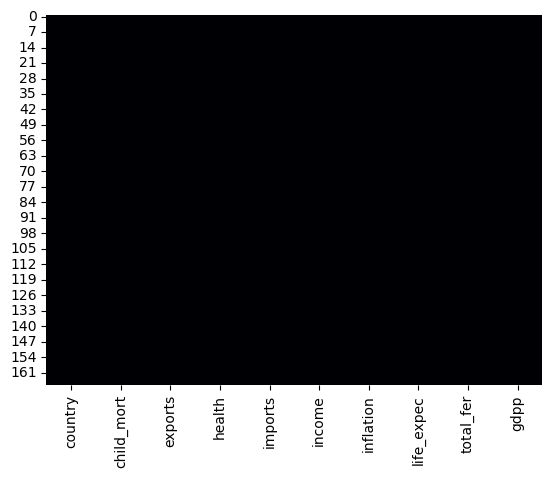

In [6]:
# check the number of missing value per column
print(country_data.isnull().sum())

# mencari data null dengan memplot data menggunakan headmap
sns.heatmap(country_data.isnull(), cmap = 'magma', cbar = False);

melakukan pengecekan data yang null, namun ternyata tidak ada data yang null dan di heatmapnya sendiri juga tidak menampilkan data yang null

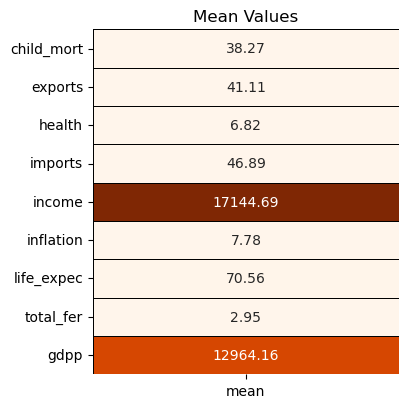

In [7]:
# menampilkan data rata-rata per tahun dengan menggunakan heatmap untuk memisahkan rata-rata yang tinggi
fig,ax = plt.subplots(nrows = 1,ncols = 1, figsize = (5,5))

plt.subplot(1,1,1)
sns.heatmap(country_data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values')

fig.tight_layout(pad = 4)

selanjutnya disini melakukan rata-rata data per fitur dengan menggunakan heatmap untuk memisahkan rata-rata yang tinggi, dan dari hasil heatmap diatas bisa dilihat bahwa data dengan rata-rata tinggi yaitu pada income dan gdpp.

In [8]:
# dari hasil analisis data diatas, terdapat 10 fitur yang dimana:
# terdapat 1 fitur dengan data categorical dan 9 data numerical
col = list(country_data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]

print('Categorical Features :', *categorical_features)
print('Numerical Features :', *numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15484\3352901308.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lt = np.tril(country_data.corr())
C:\Users\ASUS\AppData\Local\Temp\ipykernel_15484\3352901308.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(country_data.corr(),cmap = colors, annot = True,cbar = 'True',mask = lt);


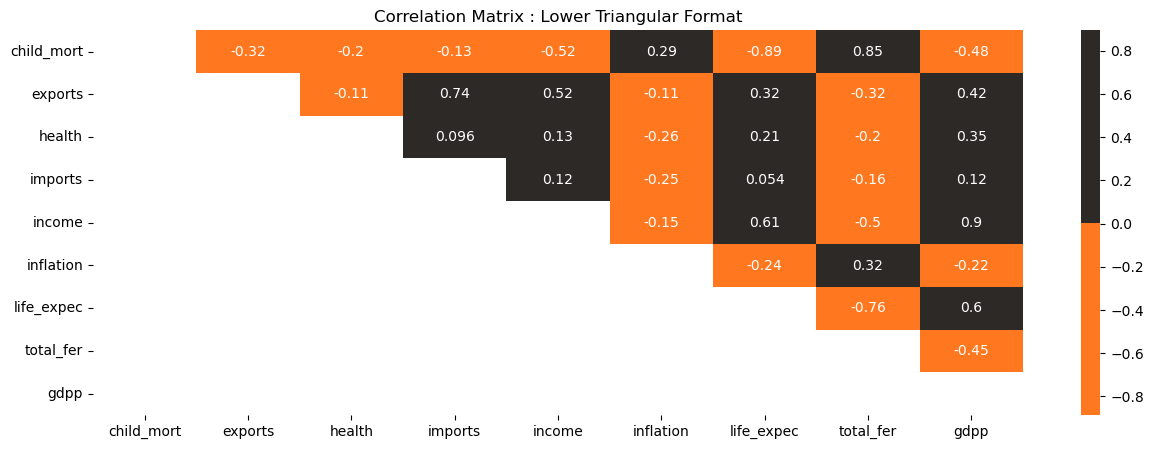

In [9]:
# pembuatan correlation matrix untuk peninjauan keterkaitan data/fitur
lt = np.tril(country_data.corr())
colors = ['#FF781F','#2D2926']

fig,ax = plt.subplots(figsize = (15,5))
sns.heatmap(country_data.corr(),cmap = colors, annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

beberapa fitur pada dasarnya berasal dari kategori yang sama dan memiliki keterkaitan terhadap fitur lainnya dari kategori yang berbeda, hal ini bisa dibuktikan dengan:

1. kenaikan nilai export meningkatkan nilai import,income, dan gdpp
2. kenaikan nilai child_mort terjadi ketika nilai inflasi dan total_fer meningkat
3. nilai life_expec yang tinggi menampilkan total_fer yang rendah dan gdpp yang tinggi menyebabkan banyak pengeluaran untuk kesehatan (health)

# Tahap Pre-Process

berdasarkan kesimpulan diatas, beberapa fitur berasal dari kategori yang sama karena memiliki keterkaitan dengan fitur lainnya oleh karena itu saya membagi kategori tersebut menjadi 3 dengan keterangan:

1. kesehatan (health) : child_mort,health,life_expec,total_fer
2. perdagangan (trade) : import, export
3. keuangan (income) : income,inflation,gdpp

In [10]:
process_data = pd.DataFrame()
process_data['health'] = (country_data['child_mort'] / country_data['child_mort'].mean()) + (country_data['health'] / country_data['health'].mean()) + (country_data['child_mort'] / country_data['child_mort'].mean())
process_data['trade'] = (country_data['imports'] / country_data['imports'].mean()) + (country_data['exports'] / country_data['exports'].mean())
process_data['finance'] = (country_data['income'] / country_data['income'].mean()) + (country_data['income'] / country_data['income'].mean()) + (country_data['income'] / country_data['income'].mean())

process_data.head()

,health,trade,finance
0,5.83,1.20,0.28
1,1.83,1.72,1.74
2,2.04,1.60,2.26
3,6.64,2.43,1.03
4,1.42,2.36,3.34


process_data untuk proses penggabungan datanya,dimana melakukan pembagian dan melakukan pembagian dengan rata-ratanya, untuk health, trade, finance dan setelah itu melihat 5 data pertamanya

lalu selanjutnya melakukan normalisasi untuk fitur yang datanya tidak menampilkan distribusi normal

In [11]:
mms = MinMaxScaler() #Normalization

process_data['health'] = mms.fit_transform(process_data[['health']])
process_data['trade'] = mms.fit_transform(process_data[['trade']])
process_data['finance'] = mms.fit_transform(process_data[['finance']])

process_data.insert(loc = 0, value = list(country_data['country']), column = 'country')
process_data.head()

,country,health,trade,finance
0,Afghanistan,0.46,0.14,0.01
1,Albania,0.10,0.20,0.07
2,Algeria,0.12,0.19,0.10
3,Angola,0.53,0.28,0.04
4,Antigua and Barbuda,0.06,0.28,0.15


untuk melakukan normalisasi tersebut menggunakan bantuan libary sklearn menggunakan fungsi MinMaxScaler, dan disini juga melakukan transform dari setiap datanya dari health,trade,dan finance dan disini juga ditambahkan countrynya untuk menambahkan nama negaranya
karena disini menggunakan MinMaxScaler, data yang disajikan itu ada direntang 0-1, jadi tidak ada yang < 0 dan > 0

In [12]:
# define data untuk dilakukan fitting (ignore categorical features)
process_data_model = process_data.drop(columns = ['country']).values

# K-Means Cluster

Digunakan Elbow Method untuk menentukan jumlah nilai k sebagai hyperparameter algoritma k-means.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

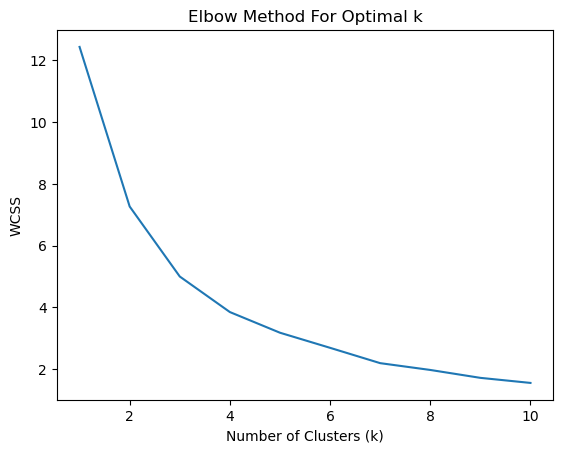

In [13]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(process_data_model)
    wcss.append(clustering.inertia_)

# Move this part outside the loop
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x=ks, y=wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()


disini menggunakan elbow method sebagai salah satu metode yg memplot Sum off Square Error untuk rentang nalai k nya. dan disini cara untuk mendapatkan nilai k nya adalah dengan melihat garis sikunya, nah pada hasil plot diatas garis siku yang mengarah ke bawah itu di angka 3, maka nilai k nya kita asumsikan 3 untuk proses clusteringnya

nah selanjutnya disini digunakan untuk pembuatan classnya, yang isinya ada dua method atau function. yang pertama ada __init__ yang berfungsi untuk inisialisasi class yang didalamnya menerima input parameter dan melakukan set atribut di dalam class k-meansnya dan yang kedua ada fuction fit yang berfungsi sebagai proses pelatihan data yang menentukan lokasi centroid dan melakukan pengelompokan data pada setiap titik dengan menghitung jarak terdekat dari centroidnya  

In [14]:
import numpy as np

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):
        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
                    print(np.sum((current_centroid - original_centroid) / original_centroid * 100.0))
                    optimized = False

            if optimized:
                break


selanjutnya disini melakukan inisiasi model, disini memasukkan hyperparameter dengan k=3 yang sesuai dari hasil elbownya methodnya tadi

In [15]:
# inisiasi model
model = K_Means(k=3)
model.fit(process_data_model)

189.965186326534
83.5644967175136
138.156491366337
11.676378950269918
18.24763339342773
7.281447390136758
0.30899566763947206
19.648407304449876
2.673302578286295
11.34133602268015
2.5550499977174645


disini melakukan plot dari hasil clusteringnya tadi, disini ada 3 dan karena disini ada 3 k nya, maka saya buat plot 3D dan hasil plotnya sendiri sudah menggelompokkan menjadi 3 data yang  berwarna hijau, biru, merah 

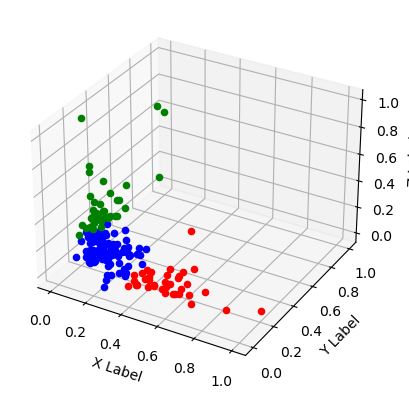

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'colors' is a dictionary mapping classification to color
colors = {0: 'red', 1: 'blue', 2: 'green'}  # Adjust this according to your classification colors

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot for 3D plot

# Plot the clusters
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        ax.scatter(featureset[0], featureset[1], featureset[2], c=color, marker='o')

# Set labels for each axis
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


dan disini saya menampilkan titik atau lokasi centroidnya

In [18]:
model.centroids

{0: array([0.5039873 , 0.18337215, 0.01867259]),
 1: array([0.13910237, 0.21447359, 0.08720416]),
 2: array([0.06773174, 0.32550908, 0.35489917])}

# Penentuan Class

In [19]:
# get data labels untuk penentuan class
labels = []

for data in process_data_model:
    for label in model.classifications[0]:
        if(data == label).all():
            labels.append(0)
            
    for label in model.classifications[1]:
        if(data == label).all():
            labels.append(1)
            
    for label in model.classifications[2]:
        if(data == label).all():
            labels.append(2)
            
process_data['class'] = labels
country_data['class'] = labels

print('Class based on country data:')
print(country_data)

Class based on country data:
                 country  child_mort  exports  health  imports  income  \
0            Afghanistan       90.20    10.00    7.58    44.90    1610   
1                Albania       16.60    28.00    6.55    48.60    9930   
2                Algeria       27.30    38.40    4.17    31.40   12900   
3                 Angola      119.00    62.30    2.85    42.90    5900   
4    Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu       29.20    46.60    5.25    52.70    2950   
163            Venezuela       17.10    28.50    4.91    17.60   16500   
164              Vietnam       23.30    72.00    6.84    80.20    4490   
165                Yemen       56.30    30.00    5.18    34.40    4480   
166               Zambia       83.10    37.00    5.89    30.90    3280   

     inflation  life_expec  total_fer   gdpp  class  
0         9.44       56.20  

jika niali income rendah dan child_mort (kematian anak) tinggi adalah tanda bahwa negara tersebut terbelakang secara ekonomi, maka digunakan fitur income dan child_mort sebagai label untuk gambar boxplot dibawah ini

nah disini memplotkan 2 yaitu class dan child_mort dan juga class dan income karena seperti penjelasan diatas 

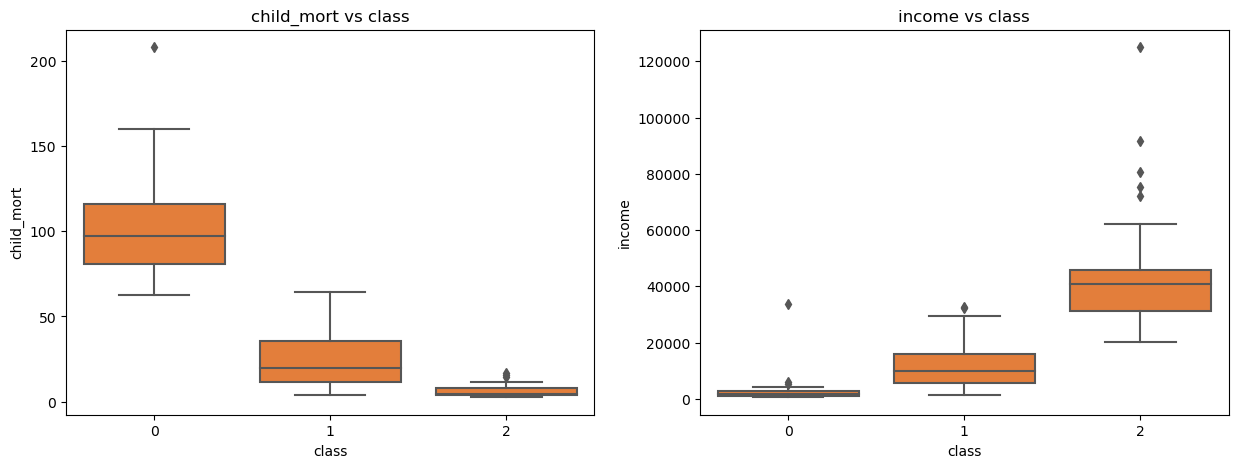

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='child_mort', data=country_data, color='#FF781F')
plt.title('child_mort vs class')  # Corrected 'tittle' to 'title'

plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='income', data=country_data, color='#FF781F')
plt.title('income vs class')  # Corrected 'tittle' to 'title'

plt.show()


pada bagian 0 disini menunjukkan tingkat kematian anak yang tinggi child_mort, sedangkan pada bagian income menunjukkan hasil yang rendah berarti diasumsikan class 0 ini membutuhkan bantuan

dari hasil plot diatas, disimpulkan:

0 : membutuhkan bantuan
1 : mungkin butuh bantuan
2 : tidak butuh bantuan

disini saya mengubah class yang awalnya dari angka 0,1,2 menjadi labels seperti ini 

In [23]:
process_data['class'].loc[process_data['class'] == 0] = 'Membutuhkan bantuan'
process_data['class'].loc[process_data['class'] == 1] = 'Mungkin butuh bantuan'
process_data['class'].loc[process_data['class'] == 2] = 'Tidak membutuhkan bantuan'

print(process_data)

                 country  health  trade  finance                  class
0            Afghanistan    0.46   0.14     0.01    Membutuhkan bantuan
1                Albania    0.10   0.20     0.07  Mungkin butuh bantuan
2                Algeria    0.12   0.19     0.10  Mungkin butuh bantuan
3                 Angola    0.53   0.28     0.04    Membutuhkan bantuan
4    Antigua and Barbuda    0.06   0.28     0.15  Mungkin butuh bantuan
..                   ...     ...    ...      ...                    ...
162              Vanuatu    0.14   0.26     0.02  Mungkin butuh bantuan
163            Venezuela    0.08   0.12     0.13  Mungkin butuh bantuan
164              Vietnam    0.13   0.40     0.03  Mungkin butuh bantuan
165                Yemen    0.27   0.17     0.03  Mungkin butuh bantuan
166               Zambia    0.40   0.18     0.02    Membutuhkan bantuan

[167 rows x 5 columns]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15484\1281541763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_data['class'].loc[process_data['class'] == 0] = 'Membutuhkan bantuan'


selanjutnya disini saya melakukan pembuatan peta beserta labelnya, untuk warna hijau berarti negara yang tidak membutuhkan bantuan, merah untuk negara yang membutuhkan bantuan dan warna orange untuk negara yang mungkin butuh bantuan

In [29]:
import plotly.express as px

fig = px.choropleth(
    process_data,
    locations='country',
    locationmode='country names',
    title='Needed Help Per Country (World)',
    color='class',
    color_discrete_map={
        'Membutuhkan bantuan': 'Red',
        'Tidak membutuhkan bantuan': 'Green',
        'Mungkin butuh bantuan': 'Orange'
    }
)

fig.update_geos(fitbounds='locations', visible=True)
fig.update_layout(legend_title_text='Labels', legend_title_side='top', title_pad_l=260, title_y=0.86)

fig.show()


dan dsini saya buat summarynya jumlah negara yang membutuhkan bantuan sekitar 99 negara, jumlah negara yang mungkin butuh bantuan ada sekitar 38 negara dan jumlah negara yang tidak membutuhkan bantuan sekitar 37 negara

In [30]:
print('Jumlah negara yang membutuhkan bantuan => {} negara'.format(process_data['class'].value_counts()[0]))
print('Jumlah negara yang mungkin butuh bantuan => {} negara'.format(process_data['class'].value_counts()[1]))
print('Jumlah negara yang tidak membutuhkan bantuan => {} negara'.format(process_data['class'].value_counts()[2]))

Jumlah negara yang membutuhkan bantuan => 92 negara
Jumlah negara yang mungkin butuh bantuan => 38 negara
Jumlah negara yang tidak membutuhkan bantuan => 37 negara


In [36]:
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class,labels
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,0,Membutuhkan bantuan
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,1,Mungkin butuh bantuan
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,1,Mungkin butuh bantuan
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530,0,Membutuhkan bantuan
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,1,Mungkin butuh bantuan
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970,1,Mungkin butuh bantuan
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500,1,Mungkin butuh bantuan
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310,1,Mungkin butuh bantuan
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310,1,Mungkin butuh bantuan
